#### Réalisé par :

AIT AMARA Mohamed, 181831072170

BOUROUINA Rania, 181831052716

CHIBANE Ilies, 181831072041

HAMMAL Ayoub, 181831048403

# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X_low = np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X_low.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

$ \sum_{i = 0}^{p} (i + 1) = p + 1 + \sum_{i = 0}^{p} + i = p + 1 + \frac{p (p + 1)}{2}$

Pour p = 6, la somme est égale à $ 7 + \frac{6 * 7}{2} = 28 $

In [5]:
def mapping(X):
    
    cols = 28
    degree = 7
    outX = np.ones((X.shape[0], cols))
    X1 = X[:, 1]
    X2 = X[:, 2]
    k = 0
    for i in range(degree):
        for j in range(i + 1):
            outX[:, k] = np.power(X1, i - j)*(np.power(X2, j));
            k = k + 1
    return outX


In [6]:
X = mapping(X_low)
X.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [7]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z));

In [8]:
k = Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [9]:
def computeCost(X, y, theta, lambda_):
    eps = 1e-15
    y_hat = np.clip(Sigmoid(X @ theta), eps, 1 - eps)
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean(axis=0) + \
            lambda_ / (2 * X.shape[0]) * (theta[1:] ** 2).sum(axis=0)

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [10]:
def gradientDescent(X, y, theta, lambda_, alpha, iterations, early_stopping=False):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    epsilon = 1e-9
    costs = []
    gradients = []
    for i in range(iterations):
        y_hat = Sigmoid(X @ theta)
        
        error = y_hat - y
        cost = computeCost(X, y, theta, lambda_)
        costs.append(cost)
        
        theta_grad = np.expand_dims((X * error).mean(axis=0), axis=1)
        gradients.append(theta_grad)
        theta[0] = theta[0] - alpha * theta_grad[0]
        theta[1:] = theta[1:] * (1 - lambda_ * alpha / X.shape[0]) - alpha * theta_grad[1:]
        
        if early_stopping and np.absolute(theta_grad.mean()) < epsilon:
            break;
    
    return theta, np.asarray(costs), np.asarray(gradients)

In [11]:
def plot_cost_gradient(costs, gradients):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("costs")
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.subplot(1, 2, 2)
    plt.title("gradients")
    for i in range(gradients.shape[1]):
        plt.plot(range(gradients.shape[0]), gradients[:, i])
    plt.xlabel('iterations')
    plt.ylabel('gardient')

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

Calculer le cout initial

Appel des la fonction de calcul du gradient

In [12]:
n = X.shape[1]
theta = np.zeros((n, 1))

initialCost=computeCost(X, y, theta, 1)
print(initialCost)

# paramètres
iterations = 10000
alpha = 0.01

# paramètre de regression
lambda_ = 1

# Appel
theta, costs, gradients = gradientDescent(X, y, theta, lambda_, alpha, iterations)
print(theta, costs.shape, gradients.shape)

[0.69314718]
[[ 1.01751236e+00]
 [ 4.43195884e-01]
 [ 9.52036236e-01]
 [-1.62491923e+00]
 [-6.21366553e-01]
 [-9.94547287e-01]
 [ 3.25486613e-02]
 [-2.67509056e-01]
 [-2.67171844e-01]
 [-1.91241027e-01]
 [-1.21974336e+00]
 [-5.88885147e-02]
 [-4.74324697e-01]
 [-1.75802478e-01]
 [-9.82886112e-01]
 [-2.46886003e-01]
 [-1.65203476e-01]
 [-5.96279358e-02]
 [-2.08232656e-01]
 [-2.04751951e-01]
 [-4.96074259e-01]
 [-8.91622482e-01]
 [ 2.93091879e-04]
 [-2.33670040e-01]
 [ 4.37328790e-05]
 [-2.56047034e-01]
 [-8.56889956e-02]
 [-8.67719051e-01]] (10000, 1) (10000, 28, 1)


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

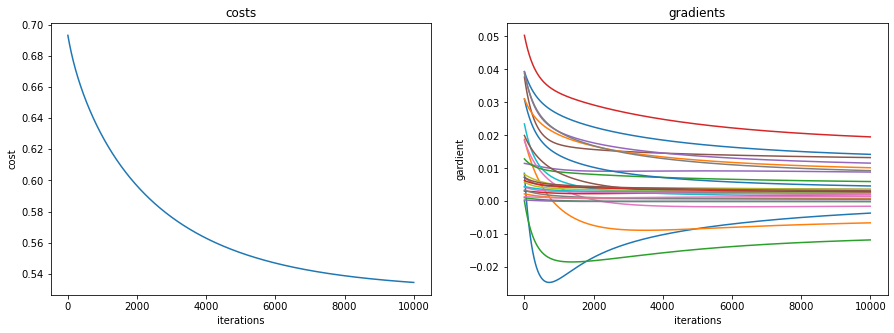

In [13]:
plot_cost_gradient(costs, gradients)

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice de nos données

In [14]:
def drawCircle(X, y, theta, title=""):
    x1, x2 = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 100),
                         np.linspace(X[:, 2].min(), X[:, 2].max(), 100))
    Z = (mapping(np.c_[np.ones(x1.size), x1.ravel(), x2.ravel()]) @ theta).reshape(x1.shape)
    
    print(np.amin(Z), np.amax(Z))

    plt.contour(x1, x2, Z, levels=[0], colors= "black", linestyles="dashed", linewidths=3)
    #plt.contourf(x1, x2, Z, cmap='RdGy')
    #plt.colorbar()
    plt.scatter(X_low[np.where(y==1),1],X_low[np.where(y==1),2], label="y=1",marker ='o')
    plt.scatter(X_low[np.where(y==0),1],X_low[np.where(y==0),2], label="y=0",marker ='x')
    
    plt.title(title)
    plt.xlabel('x 1')
    plt.ylabel('x 2')

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [15]:
def predict(X, y, theta):
    y_pred = np.zeros((X.shape[0], 1))
    y_pred[np.where(Sigmoid(X @ theta) > 0.5)] = 1
    return y_pred

# Affichage 
Graphe representant les acceptations selon les caracteristiques

-12.386665224419414 1.2073833340804563


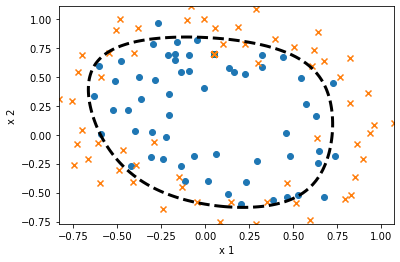

In [16]:
drawCircle(X_low, y, theta)

Traçage du coût en fonction de theta0 et theta1

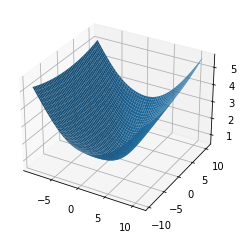

In [17]:
theta_0_range, theta_1_range = np.meshgrid(np.arange(theta[0] - 10, theta[0] + 10, 0.1), 
                                           np.arange(theta[1] - 10, theta[1] + 10, 0.1))
theta_mesh = np.expand_dims(np.stack((theta_0_range, theta_1_range), axis=-1), axis=3)
loss = np.asarray(
    [
        [computeCost(X, y, np.concatenate((theta_mesh[i, j], theta[2:]), axis=0), lambda_)[0]
             for j in range(theta_mesh.shape[1])
        ] 
        for i in range(theta_mesh.shape[0])
    ]
)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_range, theta_1_range, loss)

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [18]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X, y, theta)
precision = np.mean(y==y_pred)*100
precision

83.05084745762711

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [19]:
def compare_to_sklearn(X, y, theta):
    sklearn_model = LogisticRegression(penalty='l2')
    sklearn_model.fit(X[:, 1:], np.squeeze(y, axis=1))
    
    theta_sk = np.zeros(theta.shape)
    theta_sk[1:] = sklearn_model.coef_.reshape(-1, 1)
    theta_sk[0] = sklearn_model.intercept_[0]
    theta_sk = np.reshape(theta_sk, (-1, 1))
    
    #print("sklearn model params :", theta_sk)
    #print("our model params     :", theta)
    
    print("\nnumber of iterations of the sklearn algorithm : ", sklearn_model.n_iter_[0])
    print("\n=== using our loss")
    print("our model error     : ", computeCost(X, y, theta, 0)[0])
    print("sklearn model error : ", computeCost(X, y, theta_sk, 0)[0])
    
    print("\n=== using sklearn loss")
    print("our model error     : ", log_loss(y, Sigmoid(X @ theta)))
    print("sklearn model error : ", log_loss(y, Sigmoid(X @ theta_sk)))
    
    print("\nComparing the precision")
    print("our model precision     : ", np.mean(y==predict(X, y, theta_sk))*100)
    print("sklearn model precision : ", np.mean(y.reshape(-1,)==sklearn_model.predict(X[:, 1:]))*100)
    
    plt.figure(figsize=(25, 10))
    plt.subplot(1, 2, 1)
    drawCircle(X_low, y, theta_sk, "sklearn model")
    plt.subplot(1, 2, 2)
    drawCircle(X_low, y, theta, "our model")


number of iterations of the sklearn algorithm :  17

=== using our loss
our model error     :  0.49158502358337985
sklearn model error :  0.46246131978037225

=== using sklearn loss
our model error     :  0.49158502358337985
sklearn model error :  0.46246131978037225

Comparing the precision
our model precision     :  83.05084745762711
sklearn model precision :  83.05084745762711
-14.90658516516415 1.4926201404230857
-12.386665224419414 1.2073833340804563


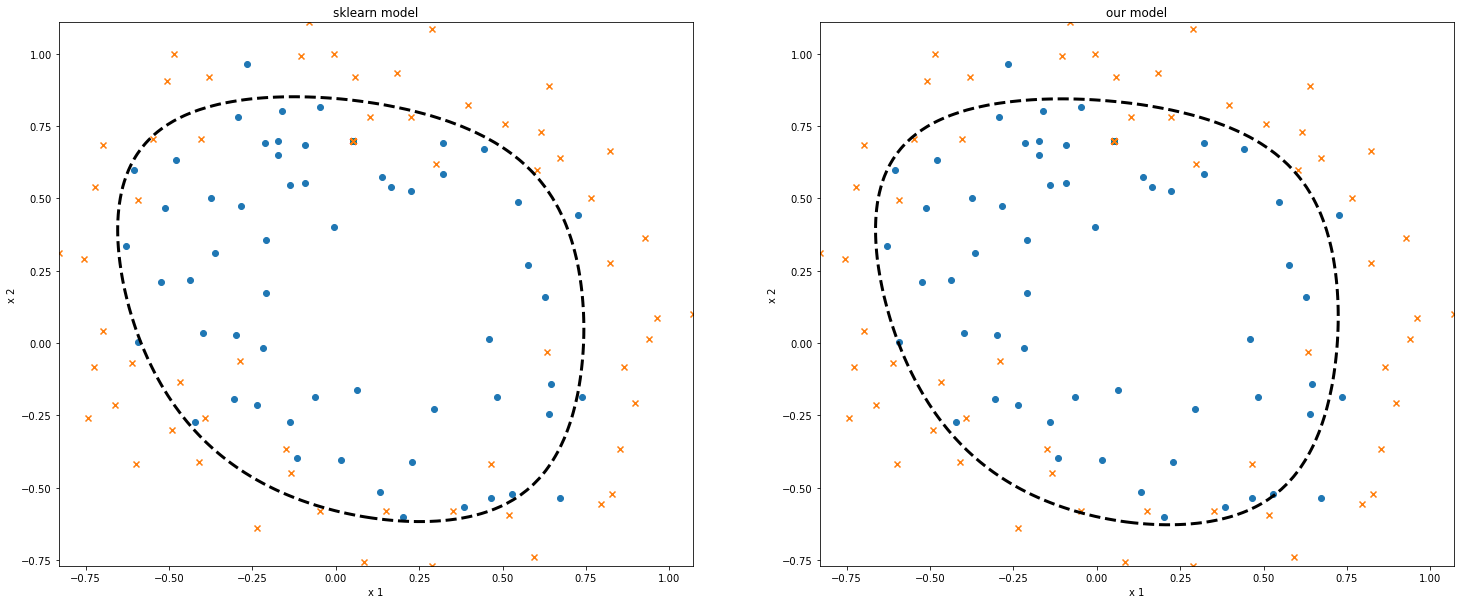

In [20]:
compare_to_sklearn(X, y, theta)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

#### Standardisation des données

In [21]:
X_mean, X_std = X[:, 1:].mean(axis=0), X[:, 1:].std(axis=0)
X_standardized = np.ones_like(X)
X_standardized[:, 1:] = (X[:, 1:] - X_mean) / X_std

In [22]:
n = X_standardized.shape[1]
theta_standardized = np.zeros((n, 1))

initialCost=computeCost(X_standardized, y, theta, 1)
print(initialCost)

# paramètres
iterations_standardized = 1500;
alpha_standardized = 0.01;
# paramètre de regression
lambda_ = 1
# Appel
theta_standardized, costs_standardized, gradients_standardized = gradientDescent(
    X_standardized, 
    y,
    theta_standardized,
    lambda_,
    alpha_standardized,
    iterations_standardized
);
print(theta_standardized, costs_standardized.shape, gradients_standardized.shape)

[0.77120258]
[[-0.22364931]
 [ 0.39085919]
 [ 0.66711118]
 [-0.52254464]
 [-0.40458236]
 [-0.45207934]
 [ 0.23304859]
 [ 0.14214355]
 [-0.0397741 ]
 [ 0.11546478]
 [-0.53464047]
 [-0.07812654]
 [-0.27611872]
 [-0.17412968]
 [-0.48718625]
 [-0.00795679]
 [-0.02164518]
 [ 0.16917647]
 [-0.09483126]
 [-0.19210922]
 [-0.1535836 ]
 [-0.45929856]
 [ 0.02062729]
 [-0.28118954]
 [ 0.05659205]
 [-0.32022124]
 [-0.10673944]
 [-0.42011355]] (1500, 1) (1500, 28, 1)


**La convergence est bien plus rapide et avec moins d'itérations**<br>
(lr=0.01, iter=10000 pour le premier et lr=0.01, iter=1500 pour le dataset standardisé)

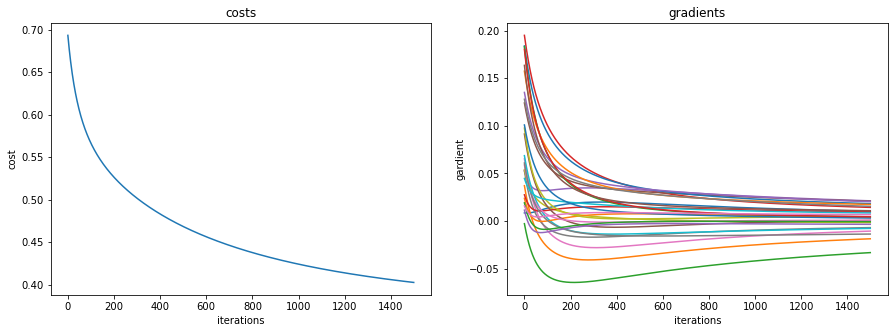

In [23]:
plot_cost_gradient(costs_standardized, gradients_standardized)

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


# bonne chance